# Model for Food Classification
## Import Libraries

This block of code imports the essential libraries for data analysis, visualization, and handling missing values:

1. **NumPy (`np`)**: A powerful numerical computing library in Python that provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.   
2. **Pandas (`pd`)**: A widely-used library for data manipulation and analysis. It provides data structures like `DataFrame` and `Series`, which allow for efficient data manipulation, cleaning, and analysis.   
3. **Matplotlib (`plt`)**: A comprehensive library for creating static, animated, and interactive visualizations in Python. It is used for generating plots, charts, and graphs from data.  
4. **Seaborn (`sns`)**: A data visualization library built on top of Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the process of generating complex visualizations.  
5. **Missingno (`msno`)**: A library specifically designed for visualizing missing data in a dataset. It provides simple, intuitive visualizations that help identify patterns of missing values and assess data quality.

These libraries form the foundation for effective data preprocessing, exploration, visualization, and handling of missing values.

In [35]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Imports for Preprocessing, Model Preparation, and Evaluation

1. **Preprocessing**:
   - `LabelEncoder` from `sklearn.preprocessing`: Encodes categorical labels as numeric values.

2. **Model Preparation**:
   - `train_test_split` from `sklearn.model_selection`: Splits the dataset into training and testing sets.
   - `RandomizedSearchCV` from `sklearn.model_selection`: Performs hyperparameter optimization using random search.

3. **Models**:
   - `RandomForestClassifier` from `sklearn.ensemble`: A classifier that uses an ensemble of decision trees.
   - `LogisticRegression` from `sklearn.linear_model`: A linear classification model used for binary and multi-class problems.

4. **Metrics**:
   - `accuracy_score` from `sklearn.metrics`: Computes the classification accuracy of the model.
   - `precision_score` from `sklearn.metrics`: Measures the precision (the ratio of true positives to all predicted positives) of the model.


In [36]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

#model preparation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Loading and Displaying the Dataset

1. **File Path**:
   - `file_path`: Specifies the location of the CSV file containing the dataset.

2. **Read CSV File**:
   - `pd.read_csv(file_path)`: Loads the CSV file into a Pandas DataFrame (`df`), which allows easy manipulation and analysis of the data.

3. **Display Data**:
   - `df.head()`: Displays the first five rows of the dataset, providing a quick look at the structure and content of the DataFrame.

In [37]:
#file path
file_path = r'recipe_site_traffic_synthesized.csv'

#read CSV file into a DataFrame
df = pd.read_csv(file_path)

#display dataframe
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Potato,6,High
1,2,36.1896,39.3312,0.6732,0.9384,Breakfast,4,High
2,3,932.5656,43.5336,3.1518,2.9376,Beverages,1,NaN
3,4,98.9706,31.1712,39.4026,0.0204,One Dish Meal,4,High
4,5,27.5910,1.8870,0.8160,0.5406,One Dish Meal,4,NaN


### Displaying DataFrame Information

1. **`df.describe()`**:
   - Provides summary statistics of the numerical columns in the dataset, such as mean, standard deviation, min, max, and quartiles.
2. **`df.info()`**:
   - Displays a concise summary of the DataFrame, including the number of non-null entries, data types of columns, and memory usage.
3. **`df.columns`**:
   - Lists all the column names in the DataFrame, helping to identify the structure of the dataset.
4. **`df.shape`**:
   - Returns a tuple representing the dimensions of the DataFrame (number of rows and columns).

In [38]:
#show dataframe information
print(df.describe())
print(df.info())
print(df.columns)
print(df.shape)

           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   444.657979     35.771069    9.227478   24.632282
std    273.519652   462.081417     44.828013   14.972759   37.097133
min      1.000000     0.142800      0.030600    0.010200    0.000000
25%    237.500000   112.638600      8.542500    1.723800    3.258900
50%    474.000000   294.321000     21.909600    4.641000   11.016000
75%    710.500000   609.603000     45.864300    9.996000   30.804000
max    947.000000  3705.823200    541.028400  151.725000  370.627200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein     

### Custom Function for Displaying Unique Values

1. **`print_uniques(df)`**:
   - A custom function that prints the unique values and their counts for each column in the DataFrame. 
2. **How it works**:
   - **`uniques_generator`**: A generator expression that iterates over each column in the DataFrame, retrieving the unique values (`df[x].unique()`) and the number of unique values (`df[x].nunique()`).
   - The function prints each column name along with the unique values and their count.  
3. **Performance**:
   - The function uses a generator to handle large datasets efficiently by generating unique values one column at a time, rather than storing them all in memory at once.

In [39]:
#defining custom function to print all unique values and their counts from each column
def print_uniques(df):
    #for large datasets - using generator for speed
    uniques_generator = ((x, df[x].unique(), df[x].nunique()) for x in df.columns)
    
    print('\nUnique Values:')
    for x, unique_values, num_unique in uniques_generator:
        print(f"{x}: \n {unique_values} \n ({num_unique} unique values)")

### Printing Unique Values for Selected Columns

1. **`print_uniques(df[['category', 'servings', 'high_traffic']])`**:
   - This line of code calls the `print_uniques` function to display the unique values and their counts for the selected columns: `category`, `servings`, and `high_traffic`.
   
2. **Result**:
   - For each of the selected columns, the function will print:
     - The unique values in the column.
     - The number of unique values.

In [40]:
#printing uniques of selected columns
print_uniques(df[['category', 'servings','high_traffic']])


Unique Values:
category: 
 ['Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert' 'Pork'] 
 (11 unique values)
servings: 
 ['6' '4' '1' '2' '4 as a snack' '6 as a snack'] 
 (6 unique values)
high_traffic: 
 ['High' nan] 
 (1 unique values)


### Handling Missing Values and Data Visualization

1. **Filling Missing Values**:
   - `df['high_traffic'] = df['high_traffic'].fillna('Low')`: This line fills any missing (NaN) values in the `high_traffic` column with the value `'Low'`.

2. **Sorting the DataFrame**:
   - `df_sorted = df.sort_values('calories')`: Sorts the DataFrame `df` by the `calories` column in ascending order, creating a new sorted DataFrame `df_sorted`.

3. **Visualizing Missing Data**:
   - `msno.matrix(df_sorted)`: Generates a matrix plot to visualize the missing data in the sorted DataFrame. The matrix highlights where missing values are located in the dataset.
   - `plt.show()`: Displays the plot.

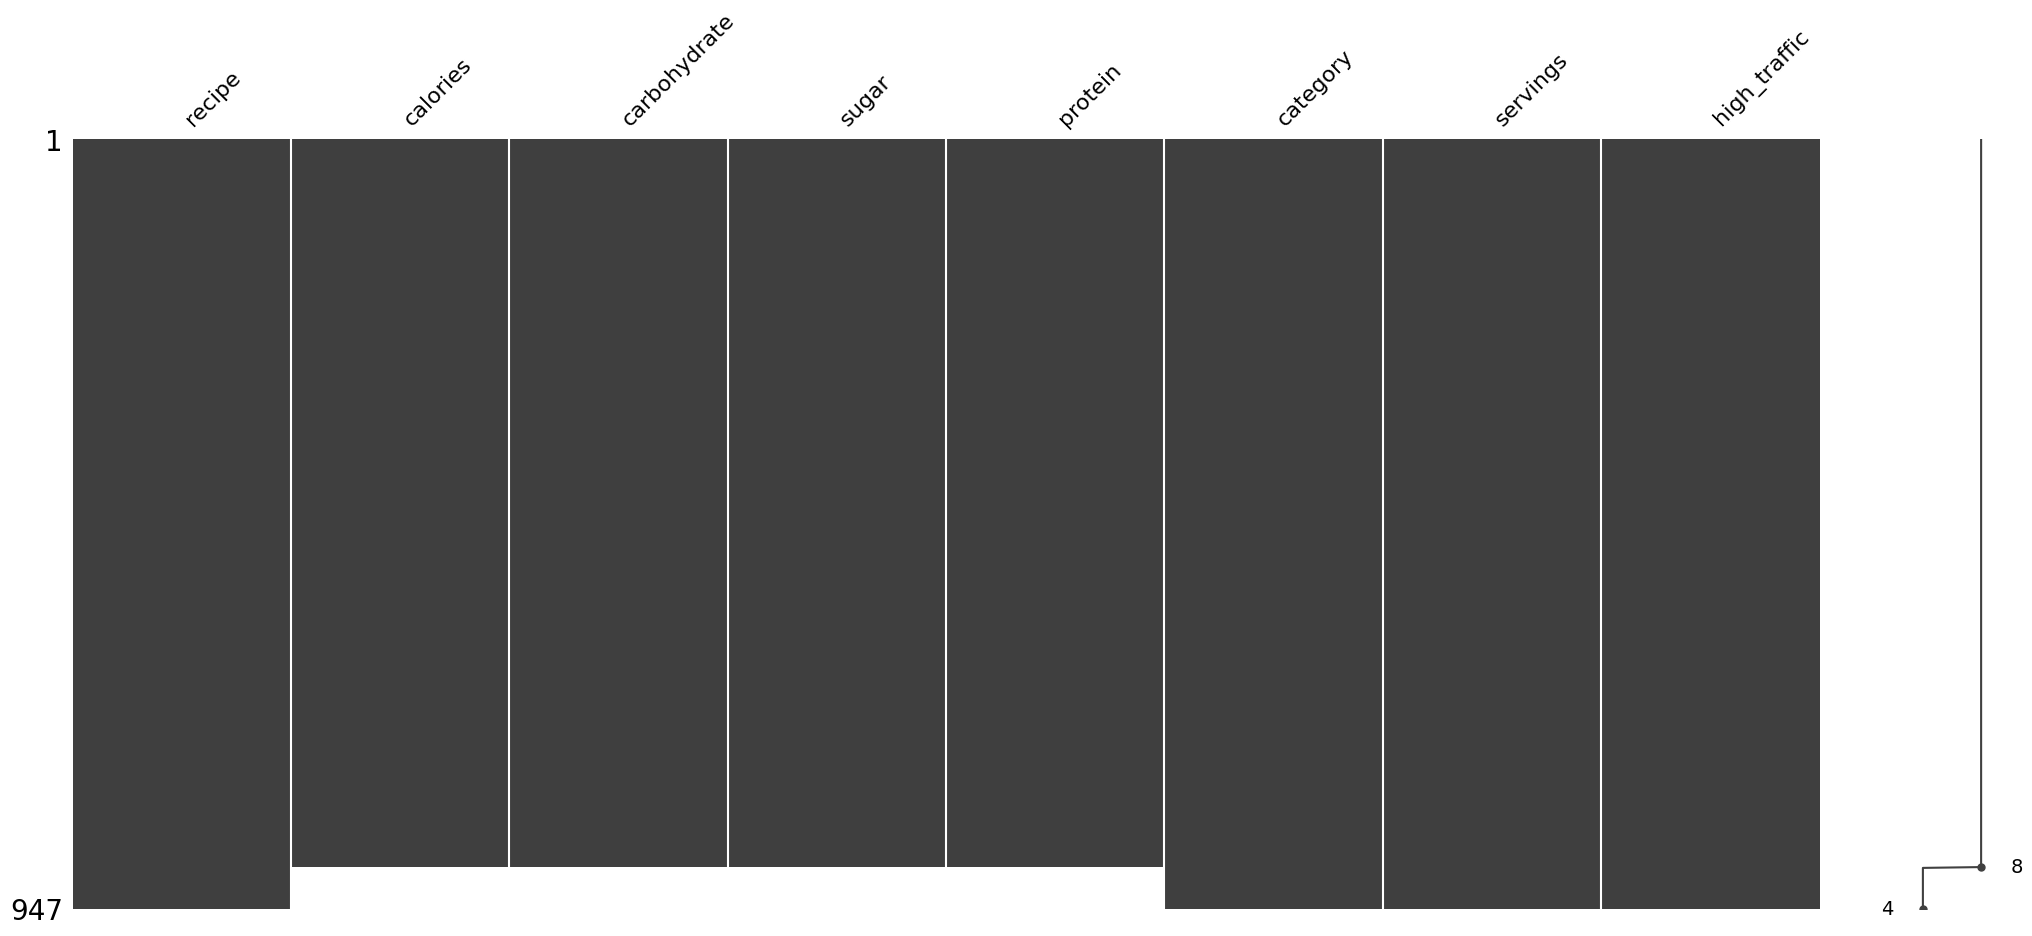

In [41]:
#fill missing values in high_traffic column with 'Low'
df['high_traffic'] = df['high_traffic'].fillna('Low')

#sort df by 'calories' column
df_sorted = df.sort_values('calories')

#create matrix of missing values
msno.matrix(df_sorted)
plt.show()

### Visualizing Missing Values with `msno`

1. **Visualizing Rows with Missing Data**:
   - `msno.bar(df[df.isna().any(axis=1)])`: This line filters the DataFrame `df` to only include rows that have at least one missing value (`df.isna().any(axis=1)`) and then uses the `msno.bar()` function to generate a bar plot showing the distribution of missing values for each column.
   
2. **Displaying the Plot**:
   - `plt.show()`: Displays the plot generated by `msno.bar()`, allowing you to visually inspect the missing data distribution.

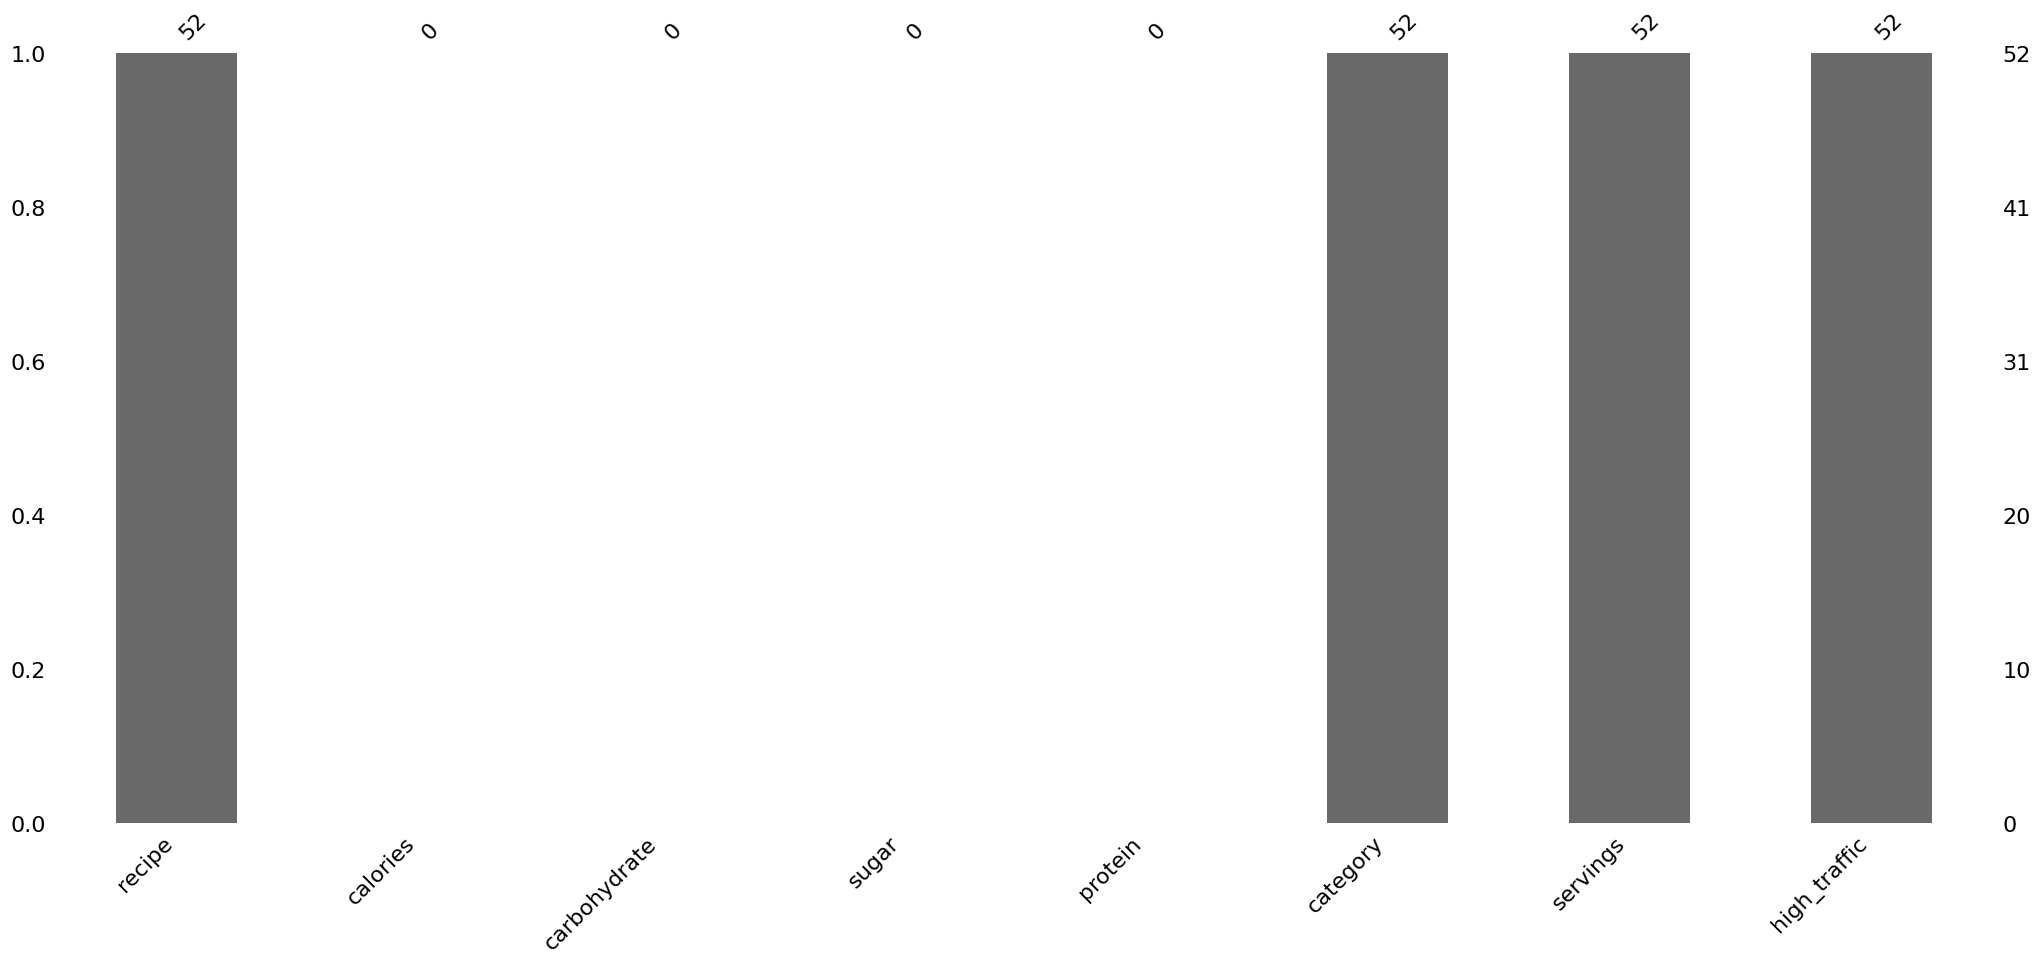

In [42]:
#using msno to visualise only missing values
msno.bar(df[df.isna().any(axis=1)])
plt.show()

### Applying a Function to Extract the First Character

1. **`keep_first_character(value)`**:
   - A custom function that extracts the first character of a given value (assumed to be a string or a number) and converts it to an integer.

2. **Applying the Function**:
   - `df['serving_count'] = df['servings'].apply(keep_first_character)`: This line applies the `keep_first_character` function to each value in the `servings` column. It creates a new column, `serving_count`, with the extracted first character as an integer.

3. **Verifying the Result**:
   - `print(df['serving_count'].unique())`: Prints the unique values in the newly created `serving_count` column to verify that the function was applied correctly.

In [43]:
def keep_first_character(value):
    return int(str(value)[0])

#apply function to all columns in df
df['serving_count'] = df['servings'].apply(keep_first_character)
print(df['serving_count'].unique()) #print unique values to verify correction

[6 4 1 2]


### Calculating Per Serving Values

1. **`calculate_per_serving(df, columns)`**:
   - A custom function that loops through the specified `columns` (e.g., nutritional columns like `calories`, `protein`, etc.) and calculates the per-serving value for each. It creates new columns in the DataFrame with the suffix `_per_serving`, where the values are calculated by dividing each value in the column by the `serving_count`.

2. **Defining Nutritional Columns**:
   - `nutritional_columns = ['calories', 'protein', 'sugar', 'carbohydrate']`: This is a list of the columns related to nutritional values that will be used in the calculation.

3. **Applying the Function**:
   - `calculate_per_serving(df, nutritional_columns)`: This line calls the `calculate_per_serving` function, passing the DataFrame `df` and the list of nutritional columns. It creates new columns in the DataFrame for each nutritional value per serving.

In [44]:
#define function to calculate per serving values
def calculate_per_serving(df, columns):
    # looping through columns
    for column in columns:
        df[f'{column}_per_serving'] = df[column] / df['serving_count']

#defining nutritional columns
nutritional_columns = ['calories', 'protein', 'sugar', 'carbohydrate']

#calculate per serving values
calculate_per_serving(df, nutritional_columns)

### Handling Missing Values and Recalculating Nutritional Values

1. **Filling Missing `per_serving` Values**:
   - **Looping by Category**:
     - The first loop iterates over each unique `category` in the DataFrame. For each category, it calculates the median of each nutritional `per_serving` column (`calories_per_serving`, `protein_per_serving`, etc.).
     - For each missing value in the `per_serving` columns, the function fills it with the respective median value calculated for that category.
   - **Print Statement**: For each category and nutritional column, the median value is displayed (rounded to 2 decimal places) to verify the imputation.

2. **Recalculating Original Nutritional Values**:
   - After filling in missing `per_serving` values, the original nutritional columns (e.g., `calories`, `protein`) are recalculated by multiplying the `per_serving` values by the `serving_count` to restore the original values based on the updated serving data.

3. **Display Summary Information**:
   - After performing the calculations and filling missing values, the `describe()` and `info()` functions are called to display the updated DataFrame's summary statistics and structure.

In [45]:
#apply median per_serving value to the missing values
for category in df['category'].unique():
    for column in nutritional_columns:
        fill_value = df.loc[df['category'] == category, f'{column}_per_serving'].median()
        print(f"Median {column} for {category}: {(fill_value).round(2)}") #values rounded for display
        df.loc[(df['category'] == category) & (df[f'{column}_per_serving'].isnull()), f'{column}_per_serving'] = fill_value

#multiply per serving column by serving count to fill missing values
for column in nutritional_columns:
    df[column] = df[f'{column}_per_serving'] * df['serving_count']

#print dataframe
print(df.describe())
print(df.info())

Median calories for Potato: 146.9
Median protein for Potato: 9.33
Median sugar for Potato: 1.68
Median carbohydrate for Potato: 5.94
Median calories for Breakfast: 97.09
Median protein for Breakfast: 1.65
Median sugar for Breakfast: 0.86
Median carbohydrate for Breakfast: 9.83
Median calories for Beverages: 66.14
Median protein for Beverages: 4.32
Median sugar for Beverages: 1.8
Median carbohydrate for Beverages: 9.81
Median calories for One Dish Meal: 42.06
Median protein for One Dish Meal: 0.15
Median sugar for One Dish Meal: 2.64
Median carbohydrate for One Dish Meal: 4.12
Median calories for Chicken Breast: 129.1
Median protein for Chicken Breast: 8.87
Median sugar for Chicken Breast: 1.54
Median carbohydrate for Chicken Breast: 11.85
Median calories for Lunch/Snacks: 110.36
Median protein for Lunch/Snacks: 10.89
Median sugar for Lunch/Snacks: 1.03
Median carbohydrate for Lunch/Snacks: 6.44
Median calories for Chicken: 124.82
Median protein for Chicken: 4.56
Median sugar for Chicke

### Plotting Category Counts

- **Countplot**: This plot visualizes the frequency of different categories in the dataset. The `category` column is used for the x-axis, with the count of each category displayed on the y-axis.
- **Sorting**: The categories are sorted by frequency (using `value_counts()`), ensuring that the most common categories are displayed first.
- **Styling**: The x-axis labels (categories) are rotated by 45 degrees for better readability.

The plot helps us understand the distribution of data across different categories in the dataset.

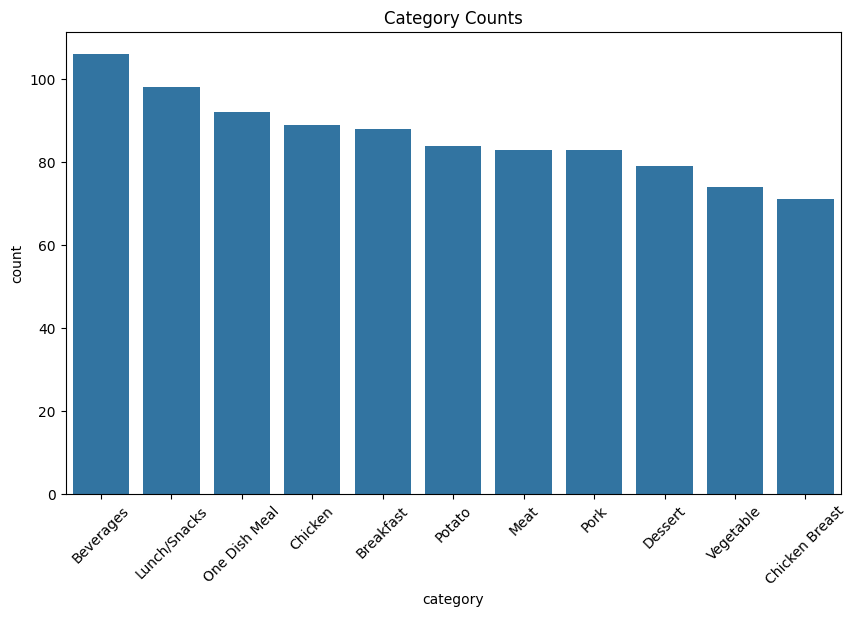

In [46]:
#plotting countplots for category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title('Category Counts')
plt.xticks(rotation=45)
plt.show()

### Category vs High Traffic Visualization

1. **Countplot with Hue**: 
   - This plot displays the count of each category on the x-axis, with different colors representing the two levels of the `high_traffic` column (Green for 'Low' and Red for 'High').
   - The `hue` argument allows us to see the distribution of high vs low traffic within each category.

2. **Crosstab Heatmap**: 
   - A heatmap is used to visualize the relationship between the `category` and `high_traffic` columns.
   - The `crosstab` function creates a table of counts for each combination of category and traffic level. The heatmap helps to identify any trends or patterns in the data (e.g., whether certain categories are more likely to have high traffic).
   - The `Oranges` color palette is used, and annotations are added for clarity.

These visualizations help explore how the traffic levels differ across categories in the dataset.

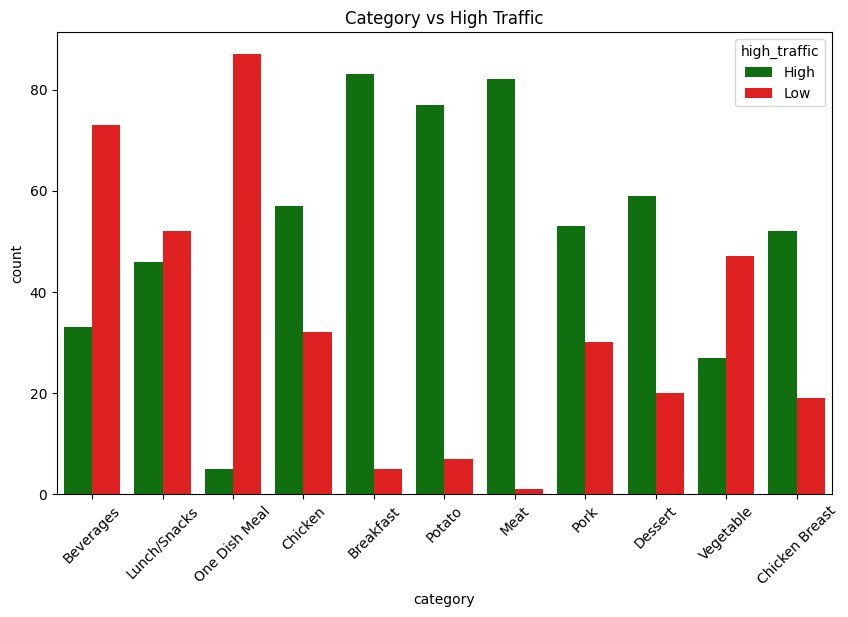

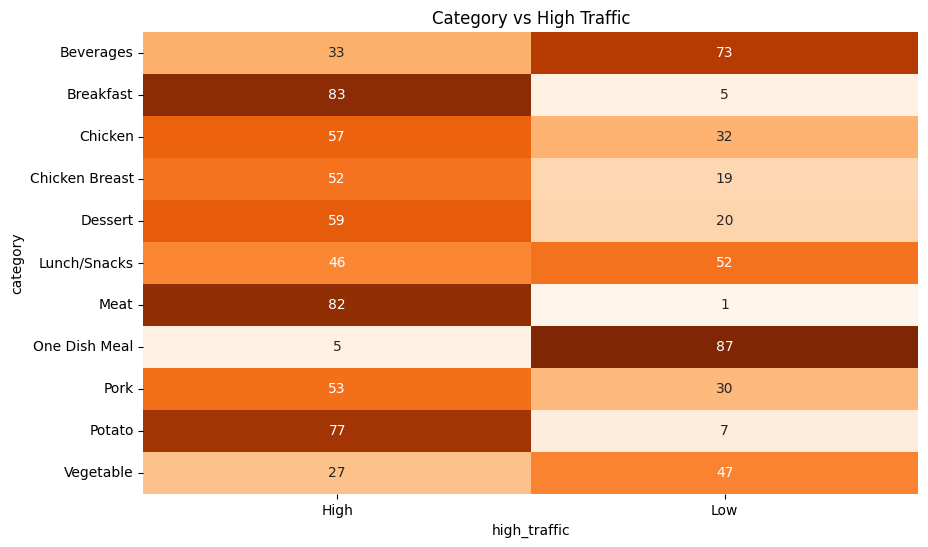

In [47]:
#plotting countplots for category vs high_traffic
plt.figure(figsize=(10, 6))
sns.countplot(x='category', hue='high_traffic', data=df, palette=['green', 'red'], order=df['category'].value_counts().index)
plt.title('Category vs High Traffic')
plt.xticks(rotation=45)
plt.show()

#plotting crosstab of category and high_traffic
cat_traffic = pd.crosstab(df['category'], df['high_traffic'])
plt.figure(figsize=(10, 6))
sns.heatmap(cat_traffic, annot=True, cmap='Oranges', cbar=False)
plt.title('Category vs High Traffic')
plt.show()

This plot visualizes the distribution of the `servings` column using a countplot. It shows how many times each serving size occurs in the dataset. The x-axis represents the different serving sizes, while the y-axis shows the count of occurrences for each size. By rotating the x-axis labels, it ensures that the labels are readable, especially if they are long or if there are many unique values.

This helps identify the most common serving sizes and any potential trends or patterns in the dataset's servings distribution.

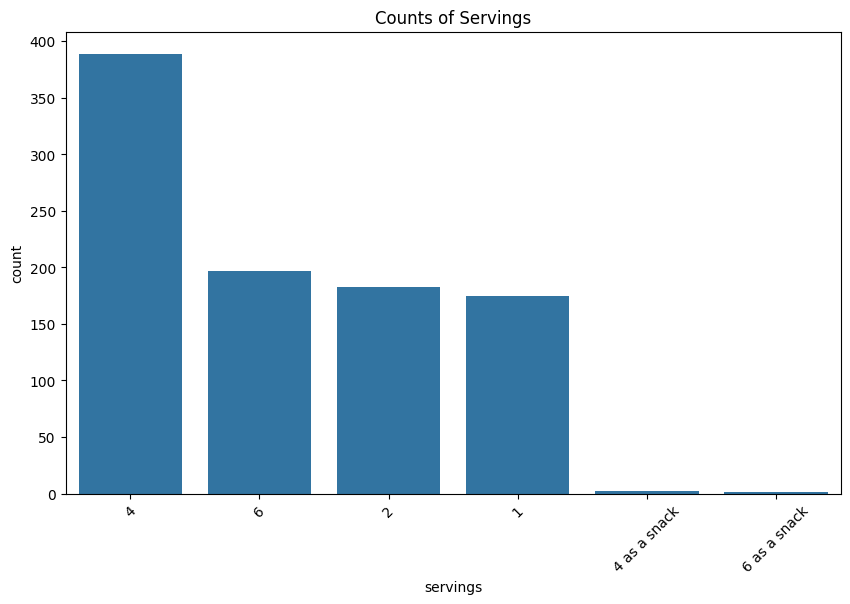

In [48]:
#plotting countplots for serving size
plt.figure(figsize=(10, 6))
sns.countplot(x='servings', data=df, order=df['servings'].value_counts().index)
plt.title('Counts of Servings')
plt.xticks(rotation=45)
plt.show()

### Visualization: Servings vs High Traffic

1. **Countplot of Servings vs High Traffic:**
   - This plot uses the `countplot` function to visualize the relationship between the `servings` and `high_traffic` columns.
   - The x-axis represents different serving sizes, and the y-axis shows the count of occurrences for each size.
   - The `hue` parameter is used to color the bars based on the `high_traffic` status (green for 'Low', red for 'High').
   - This gives insight into how traffic varies with different serving sizes.

2. **Heatmap of Servings vs High Traffic:**
   - A crosstab (`pd.crosstab`) is created to show the relationship between `servings` and `high_traffic`.
   - The heatmap visualizes this crosstab with the `annot=True` parameter to display the actual counts within the cells.
   - The color intensity (orange in this case) highlights the magnitude of counts, allowing you to easily see patterns of high and low traffic for different serving sizes.

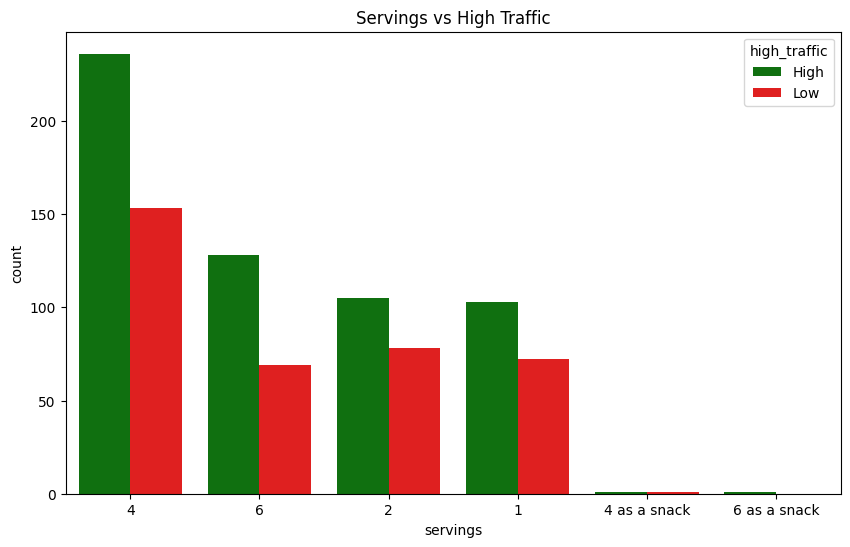

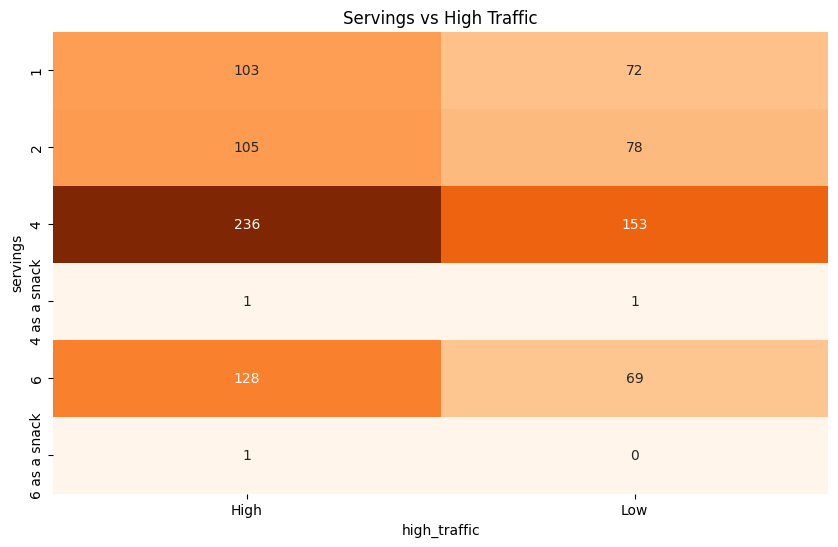

In [49]:
#plotting countplots for servings vs high_traffic
plt.figure(figsize=(10, 6))
sns.countplot(x='servings', hue='high_traffic', data=df, order=df['servings'].value_counts().index, palette=['green', 'red'])
plt.title('Servings vs High Traffic')
plt.show()

#plotting crosstab of category and high_traffic
serve_traffic = pd.crosstab(df['servings'], df['high_traffic'])
plt.figure(figsize=(10, 6))
sns.heatmap(serve_traffic, annot=True, cmap='Oranges',fmt='g', cbar=False)
plt.title('Servings vs High Traffic')
plt.show()

### Visualization: Nutritional Values vs High Traffic

1. **Boxplots for Nutritional Columns vs High Traffic:**
   - This code generates boxplots for each of the nutritional columns (`calories`, `protein`, `sugar`, `carbohydrate`) to compare their distributions for the `high_traffic` categories ('Low' and 'High').
   - The x-axis represents the `high_traffic` status, while the y-axis shows the values of the nutritional column.
   - The boxplot provides a summary of the distribution of each nutritional value, including the median, quartiles, and potential outliers.
   - This visualization helps in understanding how the nutritional values vary with different traffic categories (high vs low).

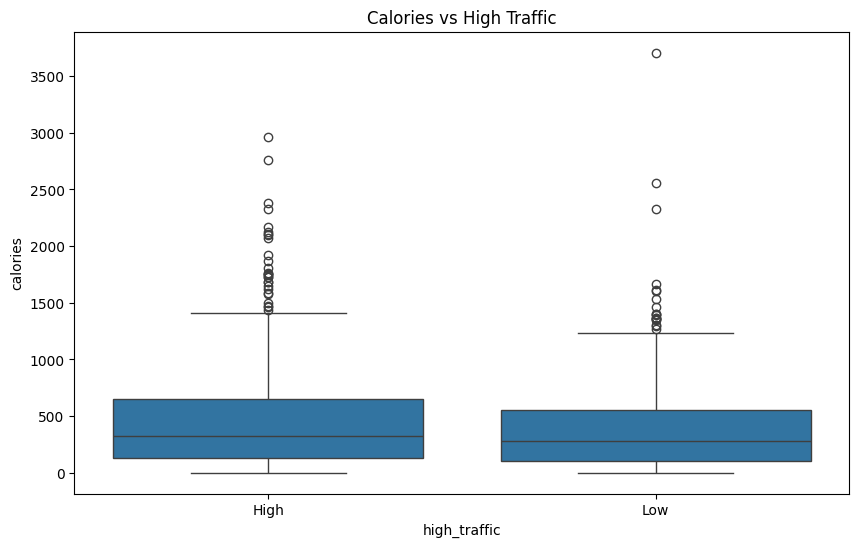

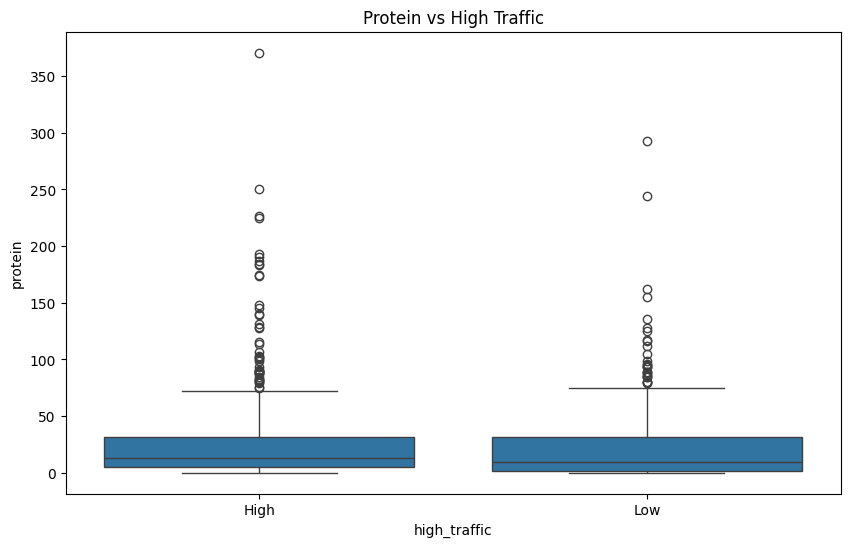

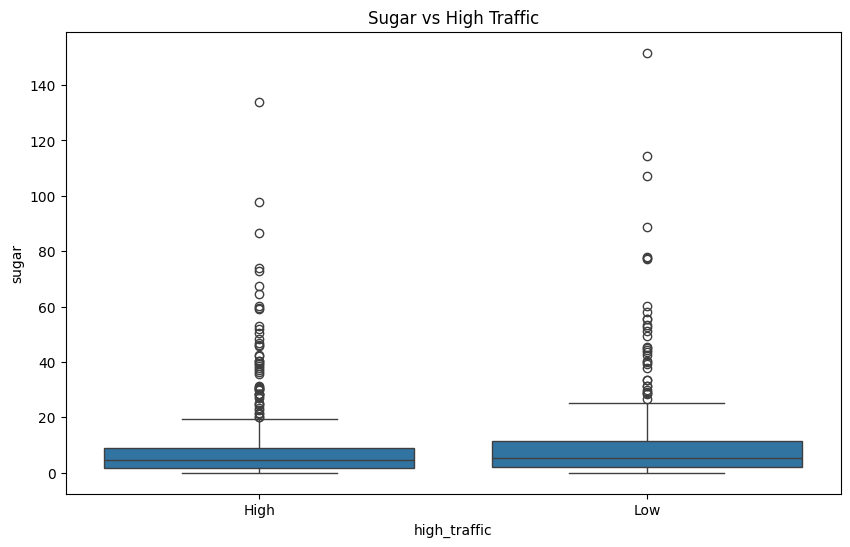

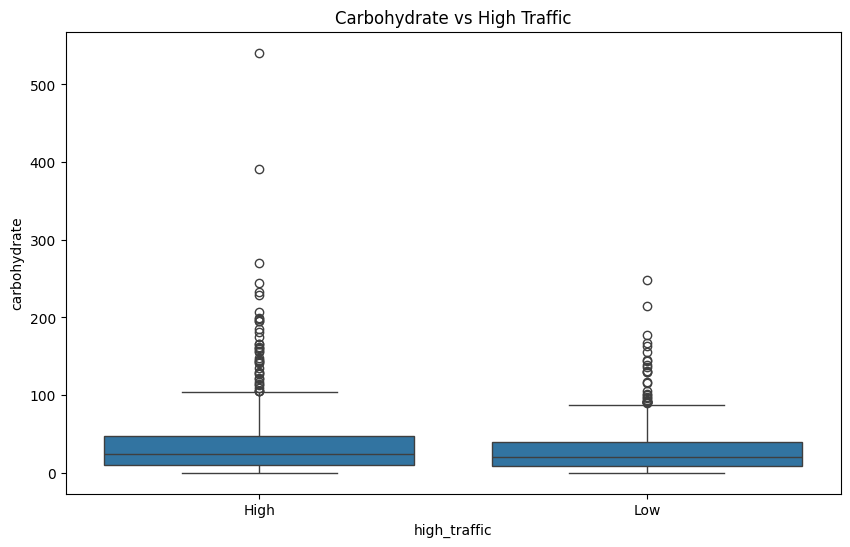

In [50]:
#plotting boxplots for nutritional columns vs high_traffic
for column in nutritional_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='high_traffic', y=column, data=df)
    plt.title(f'{column.capitalize()} vs High Traffic')
    plt.show()

### Histogram of Nutritional Columns

- This code generates histograms for each of the nutritional columns: `calories`, `protein`, `sugar`, and `carbohydrate`.
- Histograms display the frequency distribution of the values within each column.
- This helps in understanding the spread, skewness, and central tendency of the nutritional data.
- The figure size is set to 10x10 for better readability of multiple subplots.

array([[<Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'protein'}>],
       [<Axes: title={'center': 'sugar'}>,
        <Axes: title={'center': 'carbohydrate'}>]], dtype=object)

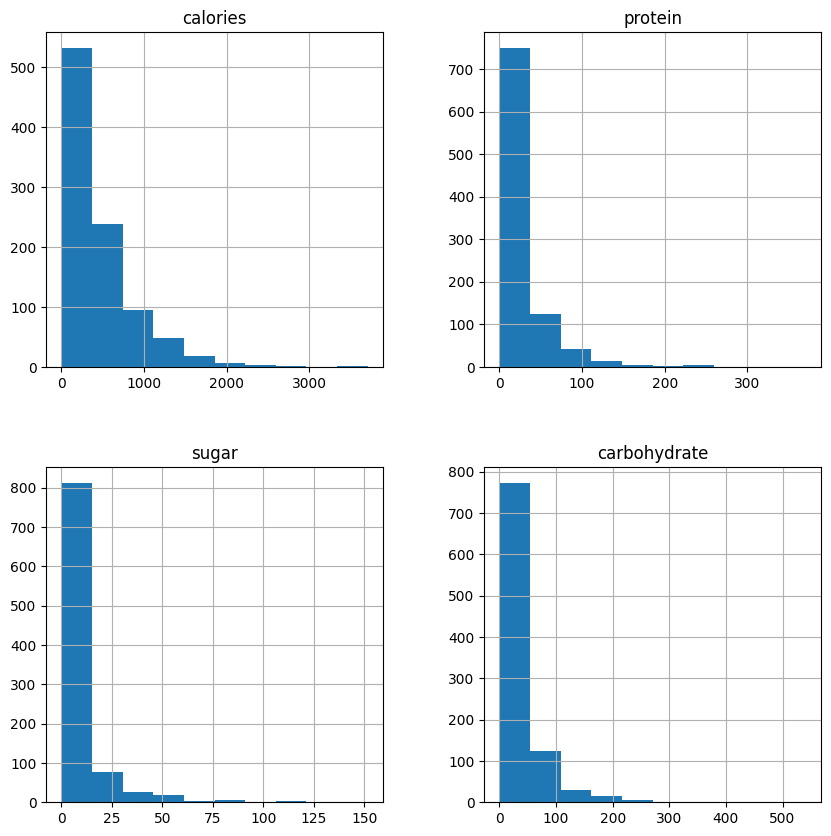

In [51]:
#plotting histograms of df columns
df[nutritional_columns].hist(figsize=(10, 10))

### Dropping Unnecessary Columns and Preparing for Modeling

- This block removes the per-serving nutritional columns (`calories_per_serving`, `protein_per_serving`, `sugar_per_serving`, `carbohydrate_per_serving`) as they are no longer needed after imputation.
- A copy of the cleaned dataframe is created and stored in `df_ml` for use in machine learning tasks, preserving the original dataset for reference or further analysis.

In [52]:
#dropping unnecessary columns
drop_cols = ['calories_per_serving', 'protein_per_serving', 'sugar_per_serving', 'carbohydrate_per_serving']
df = df.drop(drop_cols,axis=1)

#creating copy of df for ml
df_ml = df.copy()

### Log Transformation of Nutritional Columns

- Applied `log1p` (logarithm of 1 + value) transformation to the nutritional columns (`calories`, `protein`, `sugar`, `carbohydrate`) to reduce skewness and normalize their distribution.
- Renamed the transformed columns to `log1p_columnname` to clearly indicate the applied transformation.
- Printed the first few rows of the modified dataframe to verify changes.

In [53]:
#applying log transformation to nutrition columns
nutrition_columns = ['calories','protein','sugar','carbohydrate']
for column in nutrition_columns:
    df_ml[column] = np.log1p(df_ml[column])
    #rename column
    df_ml.rename(columns={column: f'log1p_{column}'}, inplace=True)

#print head of dataframe
print(df_ml.head())

   recipe  log1p_calories  log1p_carbohydrate  log1p_sugar  log1p_protein  \
0       1        6.782631            3.601386     2.402620       4.043016   
1       2        3.616029            3.697125     0.514738       0.661863   
2       3        6.839011            3.796244     1.423542       1.370571   
3       4        4.604876            3.471072     3.698894       0.020195   
4       5        3.353092            1.060218     0.596636       0.432172   

        category servings high_traffic  serving_count  
0         Potato        6         High              6  
1      Breakfast        4         High              4  
2      Beverages        1          Low              1  
3  One Dish Meal        4         High              4  
4  One Dish Meal        4          Low              4  


### Histograms of Log-Transformed Nutritional Columns

- Plotted histograms for the `log1p_` transformed nutritional columns to visualize their distributions after normalization.
- This helps assess the effectiveness of the log transformation in reducing skewness and making the data more suitable for modeling.

array([[<Axes: title={'center': 'log1p_calories'}>,
        <Axes: title={'center': 'log1p_carbohydrate'}>],
       [<Axes: title={'center': 'log1p_sugar'}>,
        <Axes: title={'center': 'log1p_protein'}>]], dtype=object)

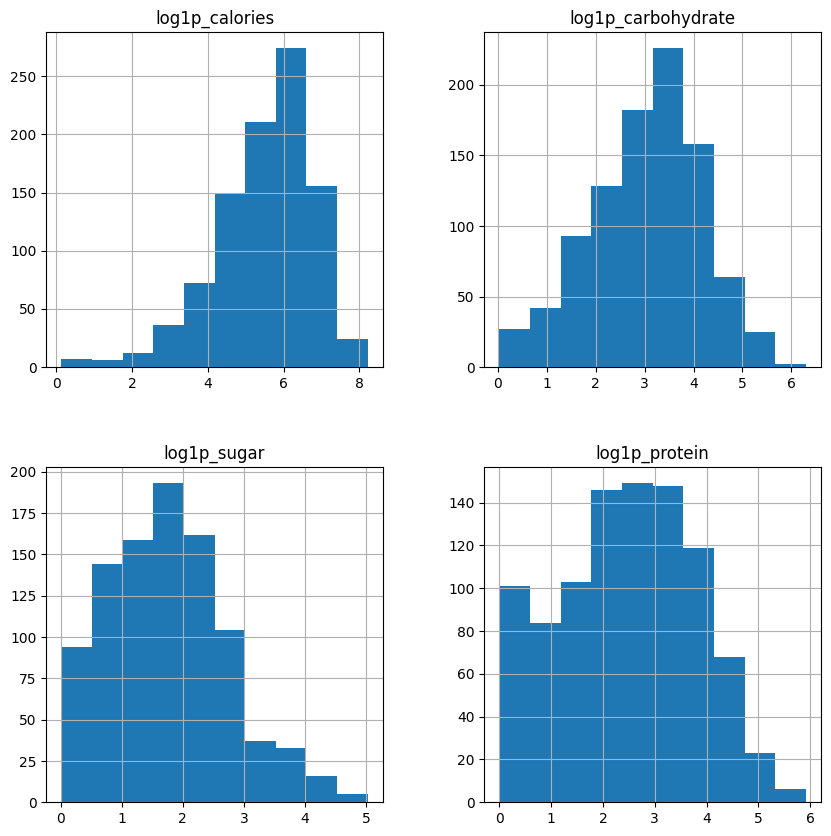

In [54]:
#plotting histograms of df columns
df_ml[['log1p_calories','log1p_carbohydrate','log1p_sugar','log1p_protein']].hist(figsize=(10, 10))

### Data Preprocessing: Encoding Categorical Variables

In this code, we perform two main preprocessing steps to prepare the dataset for machine learning:

1. **Replacing 'High' and 'Low' values with 1 and 0 in the 'high_traffic' column**:
   - The `high_traffic` column contains categorical data with values 'High' and 'Low'. We replace these values with numerical equivalents: 1 for 'High' and 0 for 'Low'. This transformation allows us to work with numerical data in machine learning models, which typically require numerical inputs.

2. **Encoding Categorical Columns**:
   - The `LabelEncoder` is used to convert categorical variables in the 'category' and 'servings' columns into numerical labels. This is necessary because machine learning algorithms cannot work directly with string labels. By encoding these categorical variables as integers, we ensure that the dataset can be efficiently used for model training.
   - The `fit_transform()` method is applied to each column in the `cat_columns` list, which applies the encoding and assigns unique integer values to each category within the column.

These preprocessing steps ensure that our data is in a suitable format for input into machine learning models.


In [55]:
#replace high_traffic column with 1 and 0
df_ml['high_traffic'] = df_ml['high_traffic'].replace({'High': 1, 'Low': 0})

#instantiate LabelEncoder
label_encoder = LabelEncoder()

#list of categorical columns to encode
cat_columns = ['category', 'servings']

#iterate through each column in the list
for column in cat_columns:
    #apply LabelEncoder to encode the column
    df_ml[column] = label_encoder.fit_transform(df_ml[column])

/tmp/ipykernel_4910/3647162939.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ml['high_traffic'] = df_ml['high_traffic'].replace({'High': 1, 'Low': 0})


### Dropping Unnecessary Columns

In this step, we remove the columns `recipe` and `serving_count` from the dataset. 

- **Why Drop These Columns?**  
  These columns may not contribute useful information for the machine learning model or analysis. For example, the `recipe` column might contain detailed descriptions or text that are not relevant for predicting the target variable. Similarly, the `serving_count` column might not provide valuable insight once the `servings` column has been encoded.

- **How It Works**:  
  The `drop()` function is used with the argument `axis=1`, which indicates we are removing columns (not rows). The columns listed in the `drop_cols` list are removed from the dataframe, ensuring that the remaining dataset contains only relevant features.

By dropping these unnecessary columns, we reduce the complexity of the dataset and improve the focus of the model.


In [56]:
#drop columns
drop_cols = ['recipe','serving_count']
df_ml = df_ml.drop(drop_cols,axis=1)

### Logistic Regression Model Training and Hyperparameter Tuning

In this code, we perform several steps to train a Logistic Regression model for classification, including data preparation, splitting the data, and hyperparameter tuning using RandomizedSearchCV.

1. **Creating a Copy of the DataFrame**:
   - We create a copy of the original dataframe (`df_ml`) and assign it to `df_model`. This ensures that we don't modify the original dataframe during model training and preprocessing.

2. **Extracting the Target Variable (`y`)**:
   - The target variable for classification is `high_traffic`. We extract this column from `df_model` and assign it to `y`, which will be used for model training.

3. **Dropping the Target Variable from the Features (`X`)**:
   - We drop the `high_traffic` column from `df_model` to create the feature matrix `X`. This leaves us with only the predictor variables for training the model.

4. **Splitting the Data into Training and Test Sets**:
   - Using `train_test_split()`, we split the data into training and test sets. We set the `test_size` to 20% of the data and ensure that the class distribution (stratification) in the `category` column is preserved in both the training and test sets.
   - The `random_state` ensures that the split is reproducible.

5. **Instantiating the Logistic Regression Model**:
   - We create an instance of the `LogisticRegression()` model, which will be used for classification.

6. **Defining the Hyperparameter Grid**:
   - A `param_grid` is defined for hyperparameter tuning, including various values for the regularization strength (`C`), penalty type, solver, maximum iterations (`max_iter`), intercept fitting, class weights, and multi-class strategies.

7. **Randomized Search for Hyperparameter Tuning**:
   - We use `RandomizedSearchCV` to perform random search cross-validation for hyperparameter optimization. The search evaluates different combinations of the hyperparameters specified in the `param_grid` over 20 iterations, using precision as the scoring metric and performing 5-fold cross-validation (`cv=5`).
   - The `n_jobs=-1` allows parallel computation to speed up the process.

8. **Fitting the Model**:
   - We fit the randomized search model on the training data (`X_train` and `y_train`). This process will search for the best hyperparameters based on the specified parameter grid.

9. **Evaluating the Best Model**:
   - After the fitting process, the best model is retrieved using `random_search_lr.best_estimator_`.
   - We also extract the best precision score and the corresponding hyperparameters, which are displayed as the output of the evaluation.

This process allows us to identify the best Logistic Regression model with the optimal hyperparameters and precision for our classification task.


In [57]:
#creating copy of the dataframe for classification
df_model = df_ml.copy()

#extract target variable
y = df_model['high_traffic']

#drop target variable from the dataframe
X = df_model.drop(['high_traffic'], axis=1)

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_model['category'], test_size=0.2, random_state=42)

#instantiate Logistic Regression model
logistic_regression = LogisticRegression()

#define parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'warm_start': [True, False],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'random_state': [None, 42]
}

#printing model eval callout
print("Evaluating Logistic Regression:")

#instantiate randomised search CV
random_search_lr = RandomizedSearchCV(logistic_regression, param_distributions=param_grid, n_iter=20, 
                                      scoring='precision', n_jobs=-1, cv=5, random_state=42)

#fit randomised search CV
random_search_lr.fit(X_train, y_train)

#best model
best_model_lr = random_search_lr.best_estimator_

#best precision score
best_precision_lr = random_search_lr.best_score_

#best hyperparameters
best_params_lr = random_search_lr.best_params_

print("\nBest Precision:", best_precision_lr)
print("Best Parameters:", best_params_lr)

Evaluating Logistic Regression:


/home/conflicted/miniconda3/envs/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/home/conflicted/miniconda3/envs/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/home/conflicted/miniconda3/envs/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then o


Best Precision: 0.652482324937568
Best Parameters: {'warm_start': True, 'solver': 'sag', 'random_state': None, 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 400, 'fit_intercept': False, 'class_weight': 'balanced', 'C': 0.001}


/home/conflicted/miniconda3/envs/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/home/conflicted/miniconda3/envs/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/home/conflicted/miniconda3/envs/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then o

### Random Forest Classifier Model Training and Hyperparameter Tuning

In this section, we train a Random Forest Classifier model and perform hyperparameter tuning using RandomizedSearchCV. The steps involved are as follows:

1. **Creating a Copy of the DataFrame**:
   - We create a copy of the dataset (`df_ml`) and assign it to `df_model`. This ensures the original dataset remains unchanged during model training.

2. **Extracting the Target Variable (`y`)**:
   - The target variable `high_traffic` is extracted from `df_model` and assigned to `y`. This will be used for model training and evaluation.

3. **Dropping the Target Variable from the Features (`X`)**:
   - The target variable (`high_traffic`) is dropped from the dataset to create the feature matrix `X`. This matrix consists only of the predictor variables used to train the model.

4. **Splitting the Data into Training and Test Sets**:
   - The `train_test_split()` function is used to split the data into training and test sets, with 20% of the data held out for testing. The `stratify` parameter ensures that the class distribution in the `category` column is maintained in both the training and test sets. The `random_state` ensures the split is reproducible.

5. **Instantiating the Random Forest Classifier**:
   - A `RandomForestClassifier()` is instantiated for the classification task. Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy.

6. **Defining the Hyperparameter Grid**:
   - A `param_grid` is defined to tune various hyperparameters of the Random Forest model. These include:
     - `n_estimators`: The number of trees in the forest.
     - `max_depth`: The maximum depth of the trees.
     - `min_samples_split`: The minimum number of samples required to split an internal node.
     - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
     - `max_features`: The number of features to consider when looking for the best split.
     - `bootstrap`: Whether bootstrap samples are used when building trees.
     - `criterion`: The function to measure the quality of a split (Gini impurity or entropy).

7. **Randomized Search for Hyperparameter Tuning**:
   - We use `RandomizedSearchCV` to perform hyperparameter optimization by searching through a random subset of the parameter grid. This method evaluates different combinations of hyperparameters over 20 iterations, using precision as the scoring metric and performing 5-fold cross-validation (`cv=5`).
   - The `n_jobs=-1` parameter ensures parallel computation to speed up the process.

8. **Fitting the Model**:
   - The `random_search_rf.fit(X_train, y_train)` function trains the Random Forest model using the training data (`X_train` and `y_train`) and tunes the hyperparameters through randomized search.

9. **Evaluating the Best Model**:
   - After training, we retrieve the best model using `random_search_rf.best_estimator_`, the highest precision score using `random_search_rf.best_score_`, and the best combination of hyperparameters using `random_search_rf.best_params_`.

This process identifies the best Random Forest model configuration, optimizing for precision, and provides the optimal hyperparameters for the classifier.


In [58]:
#creating copy of the dataframe for classification
df_model = df_ml.copy()

#extract target variable
y = df_model['high_traffic']

#drop target variable from the dataframe
X = df_model.drop(['high_traffic'], axis=1)

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df_model['category'], test_size=0.2, random_state=42)

#instantiate random forest classifier
rf_classifier = RandomForestClassifier()

#define parameter grid for random forest
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

#printing model eval callout
print("Evaluating Random Forest:")

#instantiate randomised search CV
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=20, 
                                      scoring='precision', n_jobs=-1, cv=5, random_state=42)

#fit randomised search CV
random_search_rf.fit(X_train, y_train)

#best model
best_model_rf = random_search_rf.best_estimator_

#best precision score
best_precision_rf = random_search_rf.best_score_

#best hyperparameters
best_params_rf = random_search_rf.best_params_

#printing model metrics
print("\nBest Precision:", best_precision_rf)
print("Best Parameters:", best_params_rf)

Evaluating Random Forest:

Best Precision: 0.7537117137096183
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}


### Evaluating Model Performance: Logistic Regression and Random Forest

In this section, we calculate the chance of randomly selecting a high-traffic recipe and compare it to the performance of the Logistic Regression and Random Forest models in terms of precision.

1. **Calculating the Probability of Choosing a High-Traffic Recipe at Random**:
   - The probability of randomly selecting a high-traffic recipe is calculated by dividing the number of high-traffic recipes by the total number of recipes in the dataset. This gives us a baseline probability to compare the model's performance.
   - The result is expressed as a percentage.

2. **Displaying Final Metrics for Logistic Regression**:
   - The final precision of the Logistic Regression model is displayed as a percentage. Precision is the ratio of true positive predictions to the total number of positive predictions.
   - We also calculate and display the percentage improvement of Logistic Regression's precision over the random choice baseline.

3. **Displaying Final Metrics for Random Forest**:
   - Similarly, the final precision of the Random Forest model is displayed as a percentage.
   - The percentage improvement of Random Forest's precision over the random choice baseline is also calculated.

These metrics help to assess how much better the models perform compared to random guessing, offering insight into the effectiveness of the machine learning models in predicting high-traffic recipes.


In [59]:
#calculating chance of randomly picking high traffic recipe
random_choice = df[df['high_traffic'] == 'High'].count()['high_traffic'] / len(df['high_traffic'])
print(f"Possibility of choosing high traffic recipe at random: {(100*random_choice).round(2)}%")

#displaying final metrics for logistic regression
print("\nLogistic Regression - Metrics:")
print(f"Final precision: {(100*best_precision_lr).round(3)}%")
print(f"Percentage improvement over random choice: {(100*(best_precision_lr/random_choice)-100).round(3)}%")

#displaying final metrics for random forest
print("\nRandom Forest - Metrics:")
print(f"Final precision: {(100*best_precision_rf).round(3)}%")
print(f"Percentage improvement over random choice: {(100*(best_precision_rf/random_choice)-100).round(3)}%")

Possibility of choosing high traffic recipe at random: 60.61%

Logistic Regression - Metrics:
Final precision: 65.248%
Percentage improvement over random choice: 7.648%

Random Forest - Metrics:
Final precision: 75.371%
Percentage improvement over random choice: 24.349%
